In [2]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import torch
import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

['Advertising.csv', 'Credit.csv', 'Ch10Ex11.csv', 'Income1.csv', 'College.csv', 'Auto.csv', 'Income2.csv', 'Auto.data.txt', 'Heart.csv']


PyTorch is an open-source machine learning library for Python, based on Torch, used for applications such as natural language processing. It is primarily developed by Facebook's artificial-intelligence research group, and Uber's "Pyro" Probabilistic programming language software is built on it

## [1] Reading Data:

In [3]:
df = pd.read_csv('../input/Advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# removing the inbuilt index column
df.drop('Unnamed: 0', axis = 1, inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## [2] Pair Plots:

From these, we'll get to know if the target variable has any linear relation with any of the features or not. 

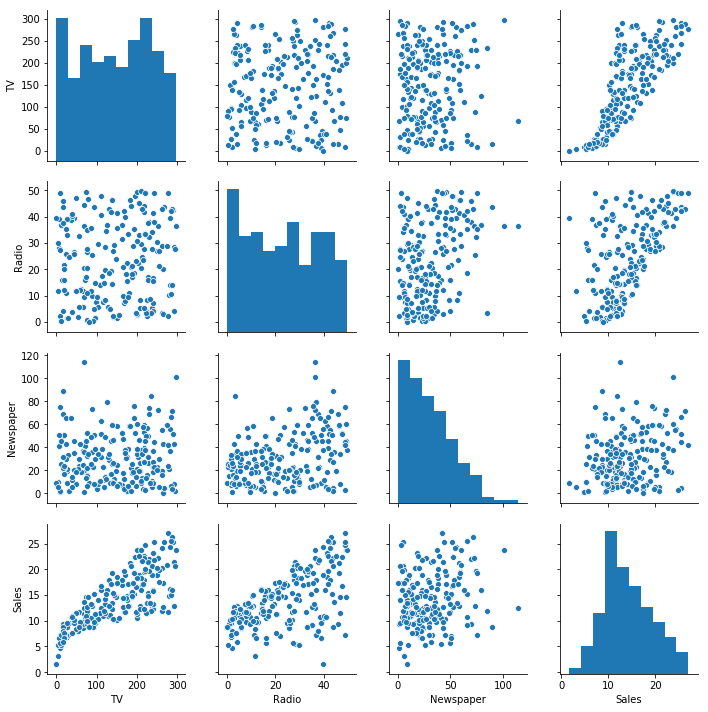

In [6]:
sns.pairplot(df)
plt.show()

## [3] Splitting features and target variable

In [7]:
x = df.drop('Sales', axis =1).values
y = df[['Sales']].values

In [8]:
# n = 200, d = 3
print(x.shape)
print(y.shape)

(200, 3)
(200, 1)


In [9]:
# Converting the numpy array features to pytorch tensors. 
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)

In [10]:
print(inputs.shape)
print(targets.shape)

torch.Size([200, 3])
torch.Size([200, 1])


## [4] Data modeling: 

For Linear Regression, we need weights and biases and since we have 1 target variable and 3 features, weights will be (1,3) and biases will be (1)

In [18]:
w = torch.randn(1,3, requires_grad=True, dtype = torch.double)
b = torch.randn(1, requires_grad=True,  dtype = torch.double)
print(w,b)

tensor([[ 0.2889,  0.6639, -0.1314]], dtype=torch.float64, requires_grad=True) tensor([0.0044], dtype=torch.float64, requires_grad=True)


In [13]:
'''Function to apply y = X.WT + b'''
def model(x):
    return torch.mm(x, w.t()) + b

'''Function to find the mean squared error between predicted and actual labels.  '''

def mse(t1, t2):
    diff = t1-t2
    return torch.sum(diff*diff)/diff.numel()

## [5] Training phase:

Iteratively predicting the values and finding the loss, and changing the weights and biases slightly towards the gradient. 

In [19]:
epochs = 1000
lr = 1e-5
loss_tr = []
for i in range(epochs):
    preds = model(inputs)    
    loss = mse(preds, targets)
    loss.backward()
    
    with torch.no_grad():
        w -= w.grad * lr
        b -= b.grad * lr
        w.grad.zero_()
        b.grad.zero_() 
    if i%100==0:
        print('[{:3}/{}] Loss : {:3.3f}'.format(i, epochs, loss.item()))
    loss_tr.append(loss.item())

[  0/1000] Loss : 2079.881
[100/1000] Loss : 22.127
[200/1000] Loss : 12.502
[300/1000] Loss : 8.006
[400/1000] Loss : 5.899
[500/1000] Loss : 4.912
[600/1000] Loss : 4.449
[700/1000] Loss : 4.231
[800/1000] Loss : 4.129
[900/1000] Loss : 4.081


In [26]:
print('Final Loss :', min(loss_tr))
print('Weights    :' , w)
print('Bias       :' , b)

Final Loss : 4.05806315972093
Weights    : tensor([[0.0535, 0.2311, 0.0118]], dtype=torch.float64, requires_grad=True)
Bias       : tensor([0.0082], dtype=torch.float64, requires_grad=True)


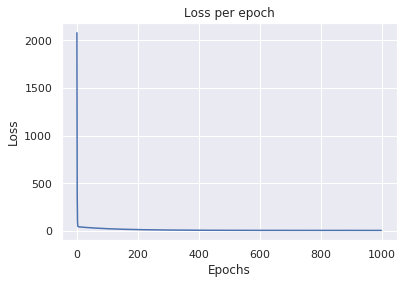

In [28]:
sns.set(style='darkgrid')
plt.plot(loss_tr)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per epoch')
plt.show()

## [6] Testing phase:

In [30]:
y_preds = model(inputs)

Now to check if the perdiction is right, we can do (pred-actual) and this value should be near 0 for all datapoints, these are called residuals. 

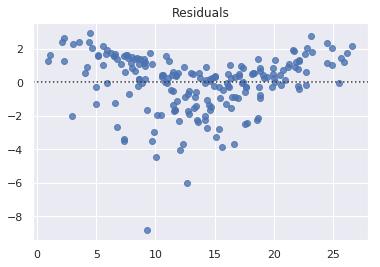

In [32]:
sns.residplot(y_preds.data.numpy(), targets.data.numpy())
plt.title("Residuals")
plt.show()

Now we can visualize the general trend of actual and predicted values as :

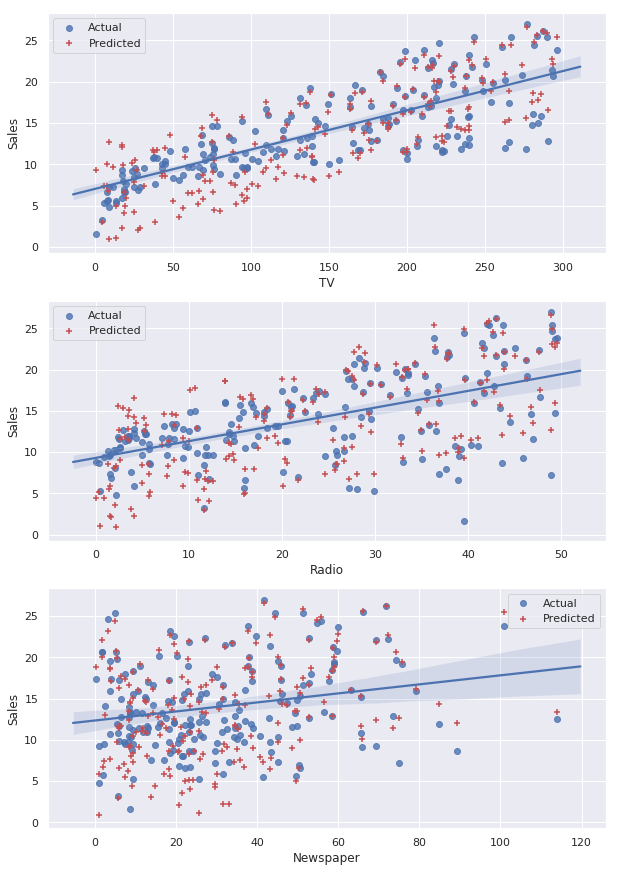

In [34]:
plt.figure(figsize=(10,15))

plt.subplot(311)
sns.regplot(x="TV", y="Sales", data=df, label = 'Actual')
plt.scatter( df[['TV']].values, y_preds.data.numpy(),color = 'r', marker = '+', label='Predicted')
plt.legend()

plt.subplot(312)
sns.regplot(x="Radio", y="Sales", data=df, label = 'Actual')
plt.scatter( df[['Radio']].values, y_preds.data.numpy(),color = 'r', marker = '+', label='Predicted')
plt.legend()

plt.subplot(313)
sns.regplot(x="Newspaper", y="Sales", data=df, label = 'Actual')
plt.scatter( df[['Newspaper']].values, y_preds.data.numpy(),color = 'r', marker = '+', label='Predicted')
plt.legend()

plt.show()


## [7] Conclusion: 
* Pytorch tensors and storing the gradients, are really helpful in these scenarios. 
* Even after 1000 epochs model has a mse loss of around 4. 
* It is still able to get the general trend of the data and can predict the sales to some extent. 